In [1]:
# https://github.com/voila-gallery/voila-spotify/blob/master/Spotify_viewer.ipynb

import pandas as pd
import os, json, datetime
import matplotlib.pyplot as plt
import spotify_fcns as sfy
from calendar import monthrange
import numpy as np
from sklearn.preprocessing import MinMaxScaler

week_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
full_weekdays = {'Sun': 'Sunday', 'Mon': 'Monday', 'Tue': 'Tuesday', 
                 'Wed': 'Wednesday', 'Thu': 'Thursday', 'Fri': 'Friday', 'Sat': 'Saturday'}
months = ['', 'January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

plt.rcParams['font.size'] = 14

tzd = -6

# for multiple files from different downloads, find way to join then

In [2]:
sp_df = sfy.getData('MyData2')
sp_df

17265 plays found across 2 files.


,endTime,artistName,trackName,msPlayed
0,2020-02-16 21:39,Matt and Kim,Daylight,159051
1,2020-02-17 18:05,Mary Spender,Melancholy Parade,154400
2,2020-02-18 21:46,Mt. Joy,Sheep,66474
3,2020-02-19 00:25,Carl Carlton,Everlasting Love,6803
4,2020-02-19 00:25,The Mamas & The Papas,California Dreamin' - Single Version,1899
...,...,...,...,...
17260,2021-02-19 19:07,Fruit Bats,Humbug Mountain Song,68230
17261,2021-02-19 20:03,dodie,She,213611
17262,2021-02-19 20:08,dodie,If I'm Being Honest,279324
17263,2021-02-19 20:11,dodie,Human,202721


In [3]:
artist_counts = sp_df['artistName'].value_counts()
artist_counts[ artist_counts > 20 ]

Rainbow Kitten Surprise                  1006
The Revivalists                           657
Of Monsters and Men                       626
insaneintherainmusic                      536
Johnny Manchild and the Poor Bastards     479
                                         ... 
NPR News Now                               21
Weezer                                     21
Radio Rental                               21
Godsmack                                   21
COIN                                       21
Name: artistName, Length: 117, dtype: int64

In [4]:
track_counts = sp_df['trackName'].value_counts()
track_counts[ track_counts > 10 ]

Monsoon                     64
For Elise                   59
Sedona                      53
It's Called: Freefall       53
Make A Move                 53
                            ..
Next To You                 11
Scattered and Lost          11
Oceans                      11
Uprising                    11
We Belong - Odesza Remix    11
Name: trackName, Length: 348, dtype: int64

In [5]:
sp_df['msPlayed'].sum() / 1000 / 60 # minutes

62310.12096666666

In [6]:
sp_df[ sp_df['artistName'] == 'OneRepublic' ]['msPlayed'].sum() / 1000 / 60 # minutes

15.694983333333333

In [7]:
# minutes played
(sp_df.groupby(['artistName'])['msPlayed'].sum() / 1000 / 60).sort_values(ascending=False)[:15]

artistName
Rainbow Kitten Surprise                  3166.583083
The Revivalists                          2618.020617
insaneintherainmusic                     2495.827933
Of Monsters and Men                      2341.192833
Johnny Manchild and the Poor Bastards    1833.803217
Lawrence                                 1590.419433
Martin O'Donnell                         1415.739683
The Moth                                 1344.772017
Hippo Campus                             1197.822517
The Lumineers                            1170.987300
The Mowgli's                             1061.959433
Better Buddies                           1051.548750
Catfish and the Bottlemen                 919.870850
The Daily                                 897.304533
Mt. Joy                                   849.733950
Name: msPlayed, dtype: float64

In [23]:
sp_df[ sp_df['artistName'] == 'Justin Timberlake' ]['trackName'].value_counts()

Series([], Name: trackName, dtype: int64)

In [9]:
sp_df['Month'] = sp_df['endTime'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')+datetime.timedelta(hours=tzd)).month)
sp_df['Date'] = sp_df['endTime'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')+datetime.timedelta(hours=tzd)).day)
sp_df['Year'] = sp_df['endTime'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')+datetime.timedelta(hours=tzd)).year)
sp_df['Day'] = sp_df['endTime'].apply(lambda x: week_days[(datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')+datetime.timedelta(hours=tzd)).weekday()])
sp_df['Hour'] = sp_df['endTime'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d %H:%M')+datetime.timedelta(hours=tzd)).hour)
sp_df

,endTime,artistName,trackName,msPlayed,Month,Date,Year,Day,Hour
0,2020-02-16 21:39,Matt and Kim,Daylight,159051,2,16,2020,Sun,15
1,2020-02-17 18:05,Mary Spender,Melancholy Parade,154400,2,17,2020,Mon,12
2,2020-02-18 21:46,Mt. Joy,Sheep,66474,2,18,2020,Tue,15
3,2020-02-19 00:25,Carl Carlton,Everlasting Love,6803,2,18,2020,Tue,18
4,2020-02-19 00:25,The Mamas & The Papas,California Dreamin' - Single Version,1899,2,18,2020,Tue,18
...,...,...,...,...,...,...,...,...,...
17260,2021-02-19 19:07,Fruit Bats,Humbug Mountain Song,68230,2,19,2021,Fri,13
17261,2021-02-19 20:03,dodie,She,213611,2,19,2021,Fri,14
17262,2021-02-19 20:08,dodie,If I'm Being Honest,279324,2,19,2021,Fri,14
17263,2021-02-19 20:11,dodie,Human,202721,2,19,2021,Fri,14


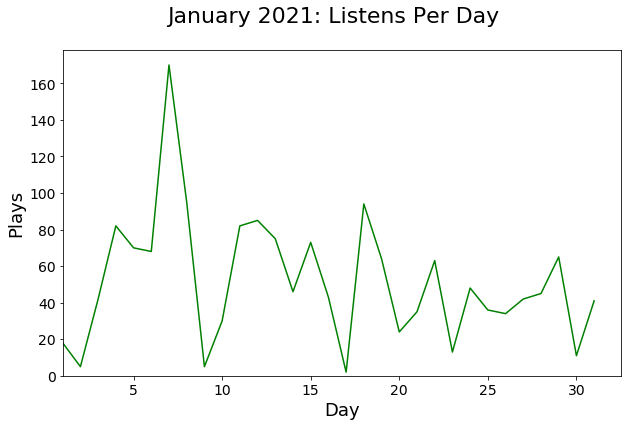

In [10]:
sfy.listensPerDay(sp_df, 1, 2021)

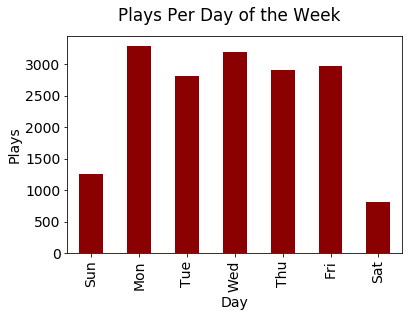

In [11]:
# plays per day of week
sfy.playsDayWeek(sp_df) 

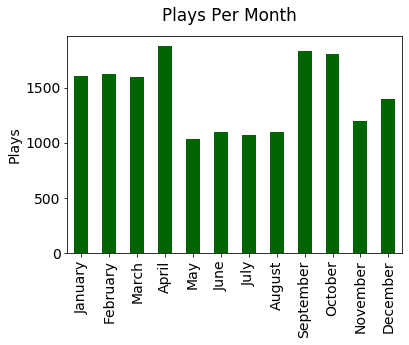

In [12]:
# total per month
sfy.totalMonth(sp_df);

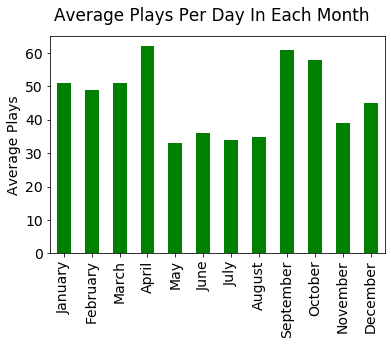

In [13]:
# average per day per month
sfy.avgDayPerMonth(sp_df);

In [14]:
# plays/time per day

# total number of days
stt = datetime.datetime.strptime(sp_df.loc[0]['endTime'].split()[0], '%Y-%m-%d')
end = datetime.datetime.strptime(sp_df.loc[len(sp_df)-1]['endTime'].split()[0], '%Y-%m-%d')
# (end-stt).days # total days

# minutes per day
minutes = sp_df['msPlayed'].sum() / 1000 / 60
minutes_per_day = minutes / (end-stt).days
print("{:.2f} minutes per day".format(minutes_per_day))

# plays per day
plays_per_day = len(sp_df) / (end-stt).days
print("{:.1f} plays per day".format(plays_per_day))

168.86 minutes per day
46.8 plays per day


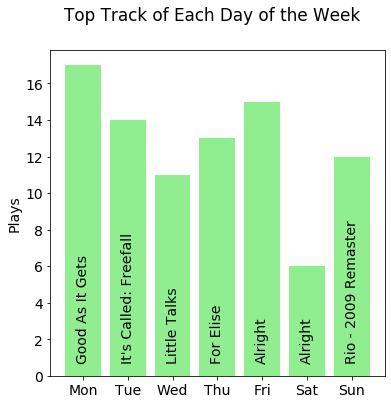

In [15]:
# top tracks by day of week
sfy.topTrackByDay(sp_df);

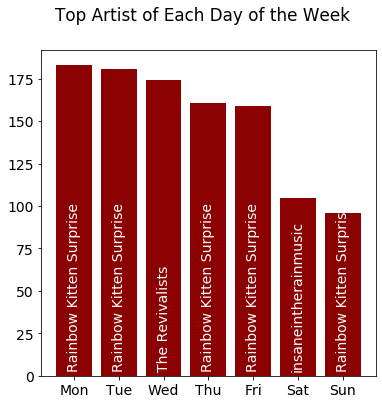

In [16]:
# top artist(s) by day of week
sfy.topArtistByDay(sp_df);

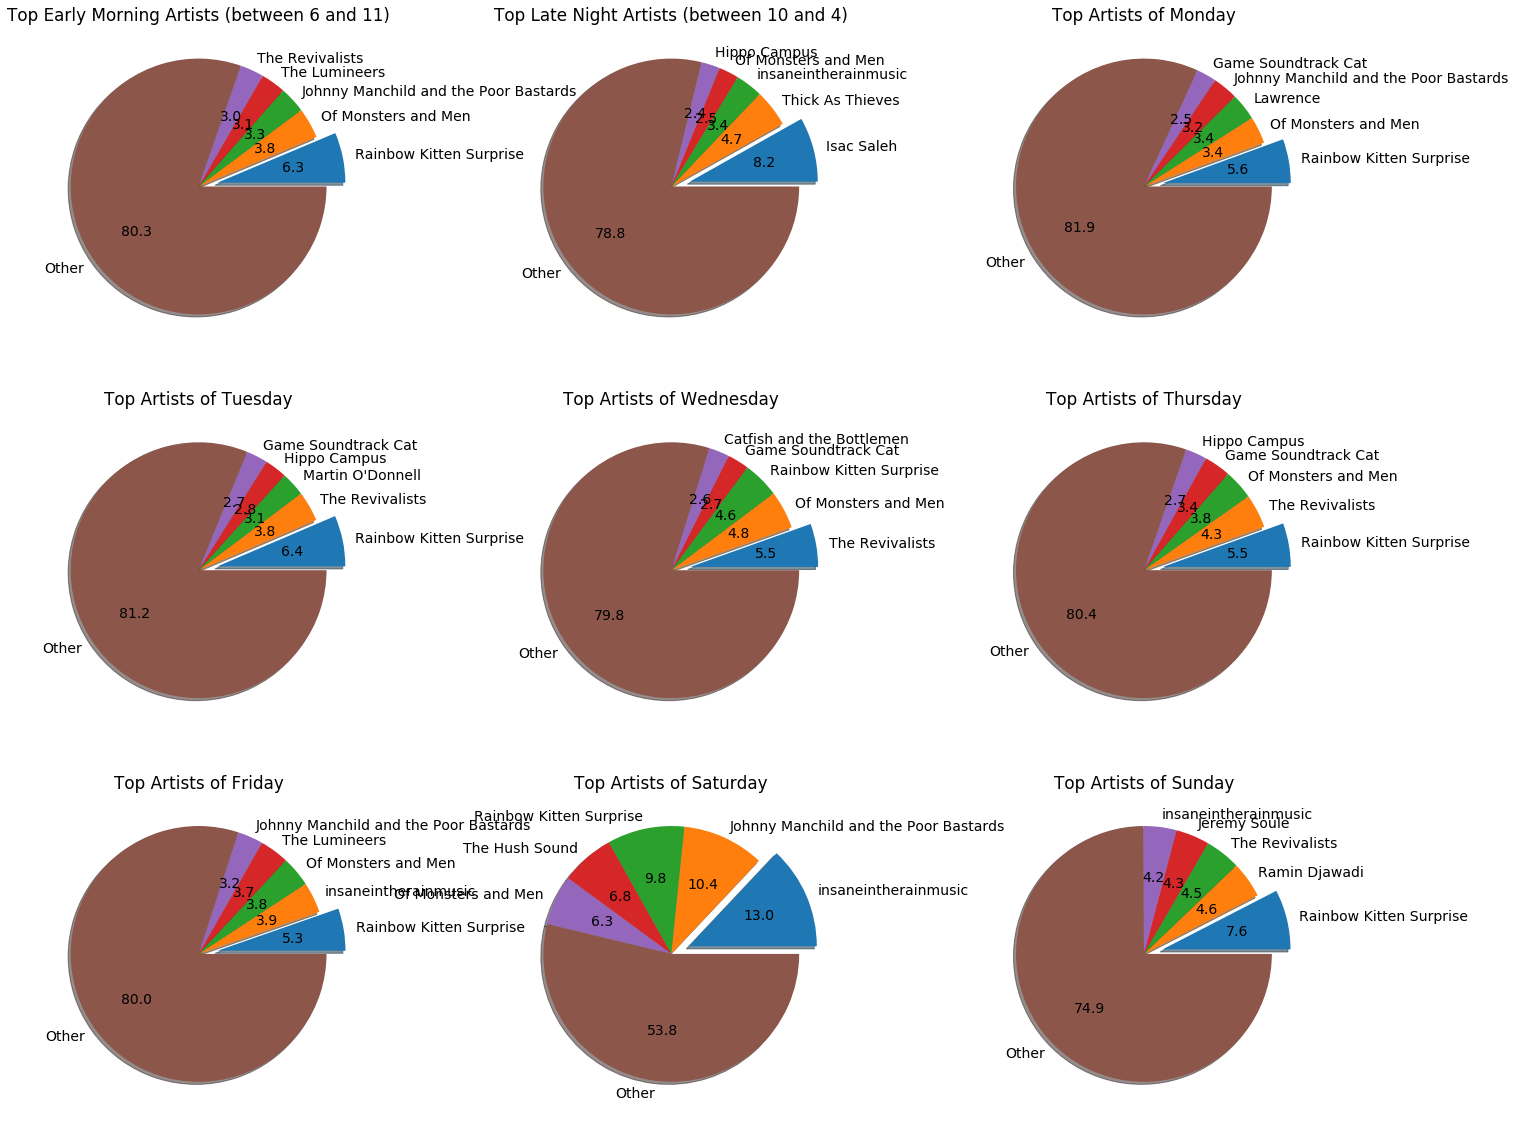

In [17]:
# top artist(s) by day of week
sfy.topArtistByDayPie(sp_df);

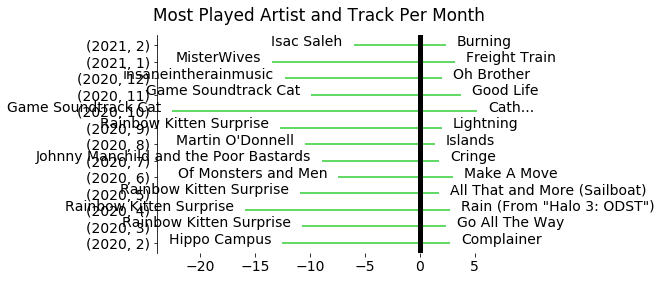

In [18]:
# top artist and track for each month

tr_gb = sp_df.groupby(['Year', 'Month'])['trackName'].value_counts()
ar_gb = sp_df.groupby(['Year', 'Month'])['artistName'].value_counts()

months = pd.unique(list(zip(sp_df['Year'], sp_df['Month'])))# [::-1]
artists = [ar_gb[m].index[0] for m in months]
ap = pd.Series([ar_gb[m][0] for m in months])
tracks = [tr_gb[m].index[0] for m in months]
tp = pd.Series([tr_gb[m][0] for m in months])

ap = ap * -1 / 10
tp = tp / 5

# plot
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.axvline(x=0, c='black', linewidth=5) # vertical line at 0
plt.hlines(list(range(len(months))), ap, tp, color='limegreen') # plot horizontal lines
plt.yticks(list(range(len(months))), months)
# plt.xticks([], [])
plt.suptitle('Most Played Artist and Track Per Month')

for i, m_d in enumerate(months):
    ax.annotate(tracks[i], xy=(tp[i], i), xytext=(tp[i]+1, i))
    ax.annotate(artists[i], xy=(ap[i], i), xytext=(ap[i]-1, i), ha='right') # xy for end?
    

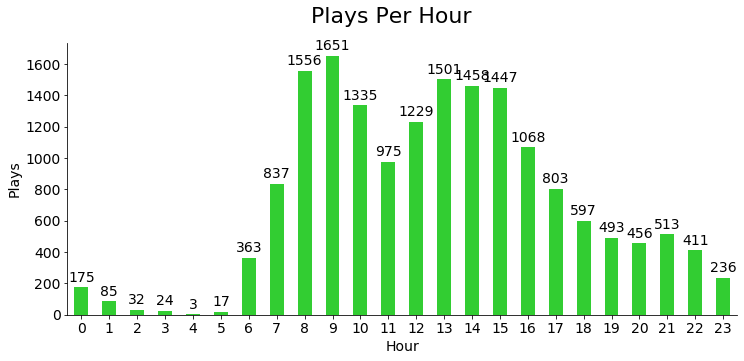

In [19]:
# plays by hour
sfy.playsByHour(sp_df);

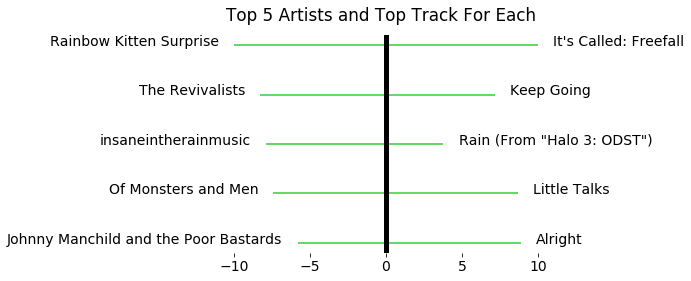

In [20]:
# similar stem/timeline for artists and top song by them

# other possible idea
# two bar plots
# 'Top x Artists' on left
# top song by artist on right

a_gb = sp_df.groupby('artistName')
ar_gb = sp_df.groupby(['artistName', 'trackName'])

# left
top_5_artists = (a_gb['msPlayed'].sum() / 1000 / 60 / 60).sort_values(ascending=False)[:5][::-1] # hours
a_gb['msPlayed'].count().sort_values(ascending=False) # plays
top_5_artists_i = top_5_artists.index

# right
ar_gb['msPlayed'].sum() / 1000 / 60 / 60
right = ar_gb['msPlayed'].count()

track_plays = []
top_tracks = []
for artist in top_5_artists.index:
    track_plays.append(right.loc[artist].sort_values(ascending=False)[0])
    top_tracks.append(right.loc[artist].sort_values(ascending=False).index[0])

# scale all values to 0 to 10 range
#scaler = MinMaxScaler(feature_range=(0,10))
#track_plays = scaler.fit_transform(np.array(track_plays).reshape(-1,1))

#scaler = MinMaxScaler(feature_range=(0,10))
#top_5_artists = scaler.fit_transform(np.array(top_5_artists).reshape(-1,1))

m = np.array(track_plays).max()
track_plays = np.array(track_plays) / (m * 0.1)

top_5_artists = top_5_artists / (top_5_artists.max() * 0.1)

# plot
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.axvline(x=0, c='black', linewidth=5) # vertical line at 0
plt.hlines(list(range(5)), top_5_artists*-1, track_plays, color='limegreen') # plot horizontal lines

plt.yticks([], [])
# plt.xticks([], []) # use this to center around 0
plt.suptitle('Top 5 Artists and Top Track For Each')

for i, m_d in enumerate(range(5)):
    ax.annotate(top_tracks[i], xy=(track_plays[i], i), xytext=(track_plays[i]+1, i))
    ax.annotate(top_5_artists_i[i], xy=(top_5_artists[i]*-1, i), xytext=((top_5_artists[i]*-1)-1, i), ha='right') # xy for end?

In [21]:
# same with snapchat data?